In [1]:
import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.utils import normalize

%matplotlib inline
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
scaler = MinMaxScaler()

edf = pd.read_csv('expenses dataset.csv')
sdf = pd.read_csv('sales dataset.csv')
edf['expenseDate'] = pd.to_datetime(edf['expenseDate'], infer_datetime_format=True)
sdf['salesDate'] = pd.to_datetime(sdf['salesDate'], infer_datetime_format=True)

In [2]:
# # Assuming X_train, y_train, X_test, y_test are your data splits

# # Scale your data
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Reshape your data for LSTM
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# # Define your LSTM model
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
# model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Use TimeSeriesSplit for cross-validation
# tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

# for train_index, val_index in tscv.split(X_train_reshaped):
#     X_train_cv, X_val = X_train_reshaped[train_index], X_train_reshaped[val_index]
#     y_train_cv, y_val = y_train[train_index], y_train[val_index]

#     # Train the model
#     model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)

#     # Evaluate on the validation set
#     val_loss = model.evaluate(X_val, y_val, verbose=0)
#     print(f'Validation Loss: {val_loss}')

# # After cross-validation, you can assess the model on your test set
# test_loss = model.evaluate(X_test_reshaped, y_test)
# print(f'Test Loss: {test_loss}')


In [3]:
selected_columns =['expenseAmount', 'expenseDate']
edf = edf[selected_columns]
selected_columns1 =['salesAmount', 'salesDate']
sdf = sdf[selected_columns1]

In [4]:
edf['eYear'] = edf['expenseDate'].dt.year
edf['eMonth'] = edf['expenseDate'].dt.month
sdf['sYear'] = sdf['salesDate'].dt.year
sdf['sMonth'] = sdf['salesDate'].dt.month
##################
edf_monthly = edf.groupby(['eYear','eMonth'])['expenseAmount'].sum().reset_index()
###################
sdf_monthly = sdf.groupby(['sYear','sMonth'])['salesAmount'].sum().reset_index()

In [5]:
selected_columns3 = ['expenseAmount'] 
edf_monthly = np.array(edf_monthly[selected_columns3]).flatten()

In [6]:
edf_monthly = edf_monthly[5:]

In [7]:
selected_columns4 = ['salesAmount'] 
sdf_monthly = np.array(sdf_monthly[selected_columns4]).flatten()

In [8]:
actual = pd.DataFrame(data={'Sales': sdf_monthly, 'Expenses':edf_monthly})
hmm = actual
hmm

,Sales,Expenses
0,3193229,2018480.0
1,24993145,2115684.0
2,19459169,1776590.0
3,22440465,2402525.0
4,26225713,2576390.0
5,31706881,2953250.0
6,27735977,2788040.0
7,28209077,2288517.0
8,29040989,3403150.0
9,32128017,2413250.0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

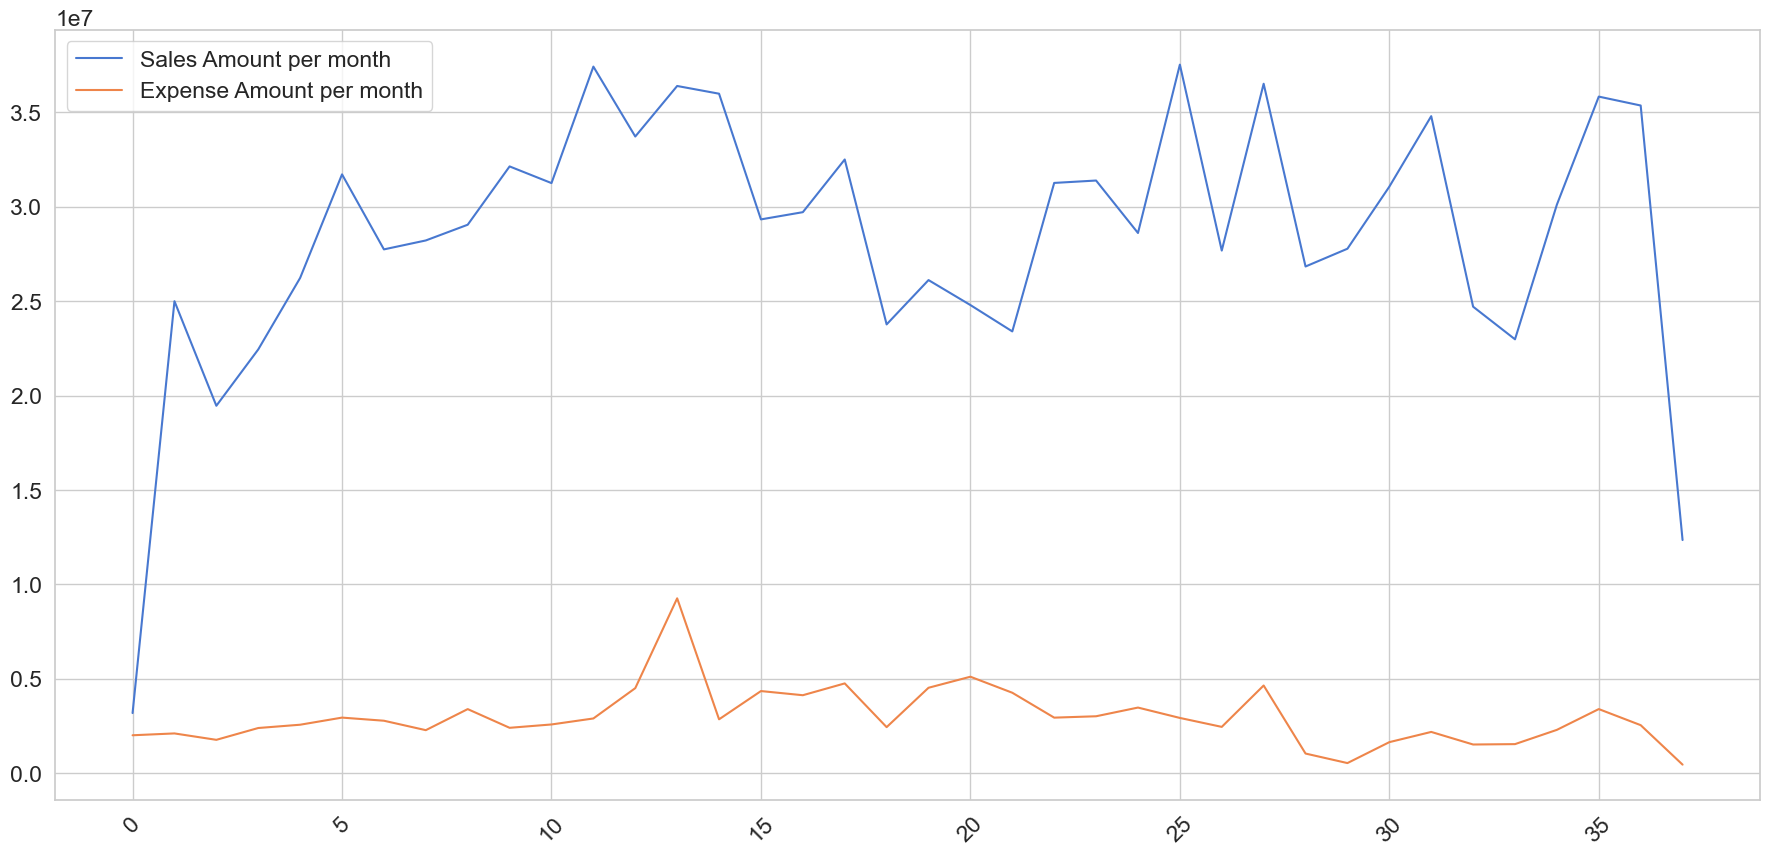

In [9]:
plt.plot(actual['Sales'], label='Sales Amount per month')
plt.plot(actual['Expenses'], label='Expense Amount per month')
plt.legend();
plt.xticks(rotation=45)

In [10]:
columns_to_scale = ['Sales', 'Expenses']

for columns in columns_to_scale:
    hmm[columns] = scaler.fit_transform(np.array(hmm[columns]).reshape(-1, 1))
    
scaled_data = hmm
scaled_data.head()

,Sales,Expenses
0,0.000000,0.176589
1,0.635159,0.187632
2,0.473922,0.149110
3,0.560784,0.220218
4,0.671071,0.239970


In [11]:
# The time series generator takes a sequence of numbers for x and y
# In this case we're sampling the same data, so X and Y have the same data
look_back=4
##################################################

# X = TimeseriesGenerator(scaled_data, scaled_data, length=look_back, batch_size=1)
##################################################

def df_to_X_y(df, look_back):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - look_back):
        row = [[a] for a in df_as_np[i:i+look_back]]
        X.append(row)
        label = df_as_np[i+look_back]
        y.append(label)
    return np.array(X), np.array(y)

In [12]:
EMX, EMy = df_to_X_y(scaled_data['Expenses'], look_back)
SMX, SMy = df_to_X_y(scaled_data['Sales'], look_back)
SMy.shape, EMy.shape

((34,), (34,))

In [13]:
SMy = np.expand_dims(SMy, axis=1)
EMy = np.expand_dims(EMy, axis=1)

In [14]:
X = np.concatenate((SMX, EMX), axis=1)
y = np.concatenate((SMy, EMy), axis=1)

In [15]:
# Split into training, testing and val.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42, shuffle=False)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42, shuffle=False)
###################################################################################################################

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test), len(X_val), len(y_val)

(18, 18, 6, 6, 10, 10)

In [22]:
y_train

array([[0.67107066, 0.23997019],
       [0.83076907, 0.28278299],
       [0.71507347, 0.26401447],
       [0.72885763, 0.20726666],
       [0.75309608, 0.33389344],
       [0.84303922, 0.22143683],
       [0.81730948, 0.24155042],
       [0.99697139, 0.27759243],
       [0.8891577 , 0.45989733],
       [0.96707182, 1.        ],
       [0.95516569, 0.27248229],
       [0.76133873, 0.44236085],
       [0.77247031, 0.41738978],
       [0.85372284, 0.48840114],
       [0.59939505, 0.22544137],
       [0.66773822, 0.46219213],
       [0.62923003, 0.52860958],
       [0.58856162, 0.43226974]])

In [20]:
################################################################################################################################
from tensorflow.keras.losses import MeanSquaredError                                                                           #
from tensorflow.keras.metrics import RootMeanSquaredError                                                                      #
from tensorflow.keras.models import Sequential                                                                                 #
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten                                                                       #
from tensorflow.keras.callbacks import ModelCheckpoint                                                                         #
from tensorflow.keras.optimizers import Adam                                                                                   #
################################################################################################################################

In [21]:
# monthly_model = Sequential([
#     LSTM(128, return_sequences=True, activation='tanh'),
#     Dropout(0.2),
#     LSTM(128, activation='tanh'),
#     Dropout(0.2),
#     Dense(64, activation = 'relu'),
#     Dense(32, activation = 'relu'),
#     Dense(2)
# ])
#Tried relu on LSTM(64) layers, batch size =2, learning rate=0.001, dropout=0.2, dense=32, lookback=3
#Tried tanh on LSTM(64) layers, batch size =2, learning rate=0.001, dropout=0.2, dense=32, lookback=3
#Tried tanh on LSTM(64) layers, batch size =2, learning rate=0.001, dropout=0.2, dense=32, lookback=4  ***
#Tried tanh on LSTM(64) layers, batch size =2, learning rate=0.001, dropout=0.1 on second layer, dense=32, lookback=4 ***

# monthly_model = Sequential([
#     LSTM(128, return_sequences=True,activation='relu'),
#     Dropout(0.3),
#     LSTM(128, return_sequences=True,activation='relu'),
#     Dropout(0.3),
#     LSTM(64, activation='relu'),
#     Dropout(0.2),
#     LSTM(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation = 'relu'),
#     Dense(2)
# ])

# monthly_model = Sequential([
#     LSTM(128, return_sequences=True, activation='tanh'),
#     LSTM(128, return_sequences=True, activation='sigmoid'),
#     LSTM(64, activation='relu'),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(32, activation='relu'),
#     Dense(2)
# ])

model = Sequential()
features = len(X_train)
model.add(LSTM(units=550, activation='tanh', return_sequences=True, input_shape=(look_back, features),dtype="float32"))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(y_train.columns), activation='softmax'))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [40]:
tscv = TimeSeriesSplit(n_splits=3)

In [41]:
monthly_model.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = [RootMeanSquaredError()])

In [42]:
for train_index, val_index in tscv.split(X_train):
    X_train_cv, X_val = X_train[train_index], X_train[val_index]
    y_train_cv, y_val = y_train[train_index], y_train[val_index]

    # Train the model

#     monthly_model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=700, batch_size=2 , verbose=2)


In [43]:
 monthly_model.fit(X_train_cv, y_train_cv,validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=2)

Epoch 1/200
1/1 - 32s - loss: 0.0249 - root_mean_squared_error: 0.1578 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857 - 32s/epoch - 32s/step
Epoch 2/200
1/1 - 0s - loss: 0.0226 - root_mean_squared_error: 0.1502 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1944 - 368ms/epoch - 368ms/step
Epoch 3/200
1/1 - 0s - loss: 0.0215 - root_mean_squared_error: 0.1466 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2027 - 318ms/epoch - 318ms/step
Epoch 4/200
1/1 - 0s - loss: 0.0250 - root_mean_squared_error: 0.1582 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010 - 333ms/epoch - 333ms/step
Epoch 5/200
1/1 - 1s - loss: 0.0292 - root_mean_squared_error: 0.1709 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1981 - 595ms/epoch - 595ms/step
Epoch 6/200
1/1 - 0s - loss: 0.0215 - root_mean_squared_error: 0.1465 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1955 - 448ms/epoch - 448ms/step
Epoch 7/200
1/1 - 0s - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_los

Epoch 54/200
1/1 - 0s - loss: 0.0238 - root_mean_squared_error: 0.1541 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1793 - 284ms/epoch - 284ms/step
Epoch 55/200
1/1 - 0s - loss: 0.0296 - root_mean_squared_error: 0.1720 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1811 - 277ms/epoch - 277ms/step
Epoch 56/200
1/1 - 0s - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1822 - 300ms/epoch - 300ms/step
Epoch 57/200
1/1 - 0s - loss: 0.0221 - root_mean_squared_error: 0.1486 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806 - 285ms/epoch - 285ms/step
Epoch 58/200
1/1 - 0s - loss: 0.0256 - root_mean_squared_error: 0.1600 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787 - 270ms/epoch - 270ms/step
Epoch 59/200
1/1 - 0s - loss: 0.0241 - root_mean_squared_error: 0.1552 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1779 - 283ms/epoch - 283ms/step
Epoch 60/200
1/1 - 0s - loss: 0.0212 - root_mean_squared_error: 0.1455

Epoch 107/200
1/1 - 0s - loss: 0.0223 - root_mean_squared_error: 0.1494 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1769 - 366ms/epoch - 366ms/step
Epoch 108/200
1/1 - 0s - loss: 0.0256 - root_mean_squared_error: 0.1601 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1762 - 451ms/epoch - 451ms/step
Epoch 109/200
1/1 - 1s - loss: 0.0227 - root_mean_squared_error: 0.1506 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752 - 500ms/epoch - 500ms/step
Epoch 110/200
1/1 - 0s - loss: 0.0239 - root_mean_squared_error: 0.1545 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1742 - 489ms/epoch - 489ms/step
Epoch 111/200
1/1 - 1s - loss: 0.0238 - root_mean_squared_error: 0.1543 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735 - 544ms/epoch - 544ms/step
Epoch 112/200
1/1 - 1s - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743 - 613ms/epoch - 613ms/step
Epoch 113/200
1/1 - 1s - loss: 0.0257 - root_mean_squared_error:

Epoch 160/200
1/1 - 0s - loss: 0.0190 - root_mean_squared_error: 0.1378 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1767 - 284ms/epoch - 284ms/step
Epoch 161/200
1/1 - 0s - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758 - 264ms/epoch - 264ms/step
Epoch 162/200
1/1 - 0s - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752 - 285ms/epoch - 285ms/step
Epoch 163/200
1/1 - 0s - loss: 0.0201 - root_mean_squared_error: 0.1419 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1745 - 331ms/epoch - 331ms/step
Epoch 164/200
1/1 - 0s - loss: 0.0199 - root_mean_squared_error: 0.1412 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733 - 267ms/epoch - 267ms/step
Epoch 165/200
1/1 - 0s - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1710 - 292ms/epoch - 292ms/step
Epoch 166/200
1/1 - 0s - loss: 0.0210 - root_mean_squared_error:

<Axes: >

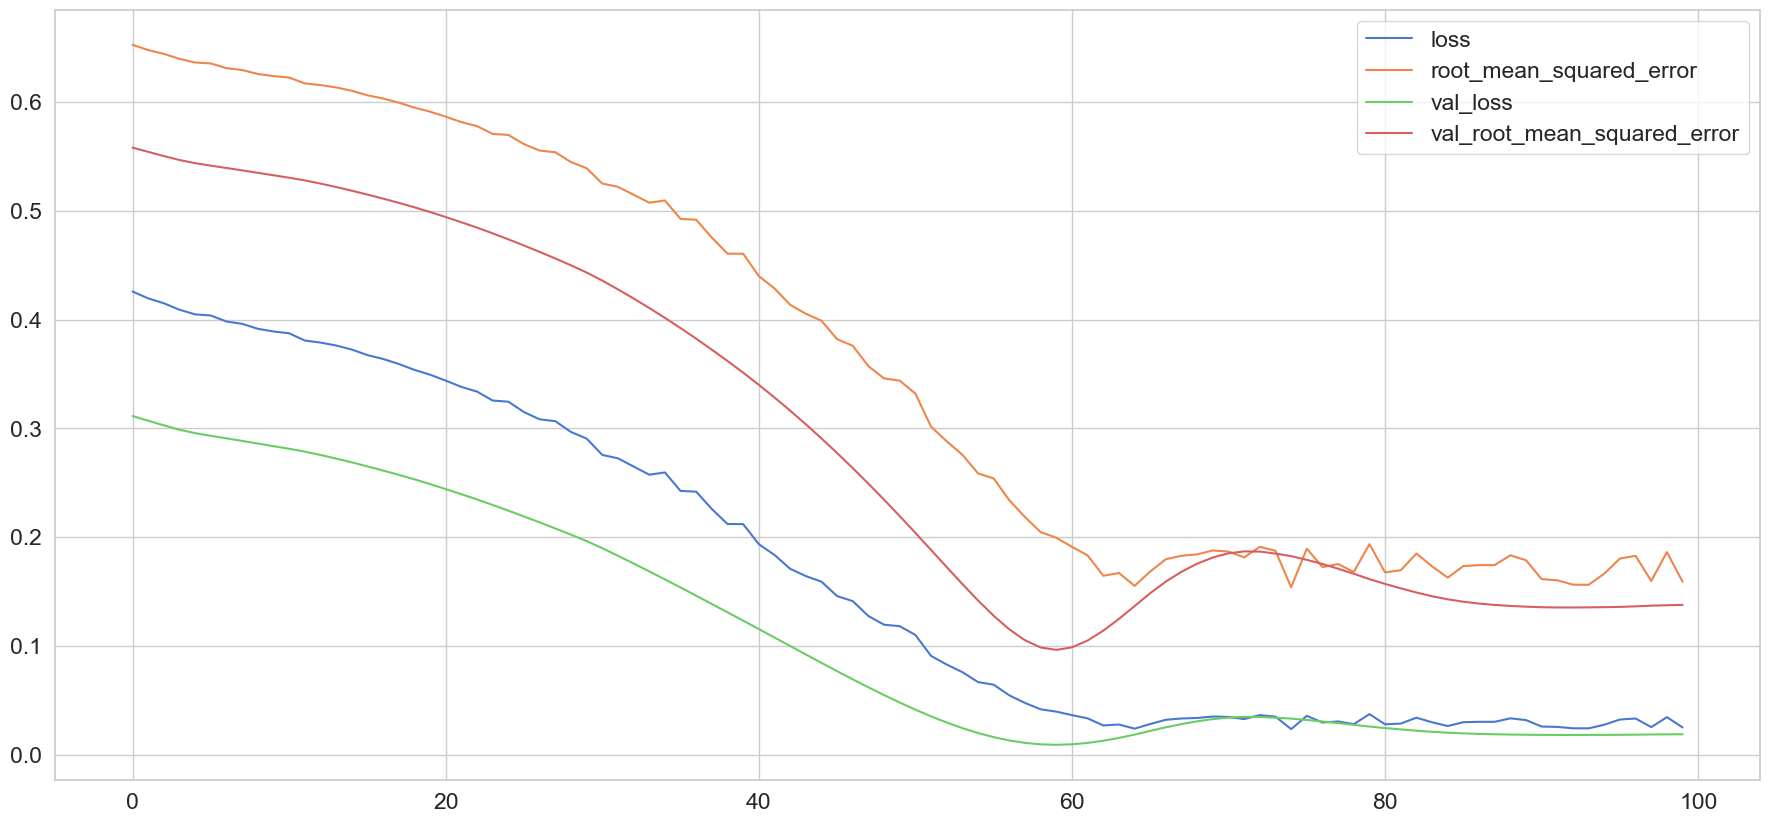

In [29]:
loss = pd.DataFrame(monthly_model.history.history)
loss.plot()

In [30]:
train_predict=monthly_model.predict(X)
train_predict=scaler.inverse_transform(train_predict)
train_predict.shape

2/2 [==============================] - 6s 43ms/step


(34, 2)

In [31]:
df = pd.DataFrame(train_predict, columns=['sales', 'expenses'])
df, len(df)

(        sales    expenses
 0   4893410.0  2496248.00
 1   5900634.0  2966636.25
 2   6173708.5  3087322.00
 3   6662234.5  3312415.50
 4   6958796.0  3450884.00
 5   7119549.5  3525904.50
 6   7078254.0  3504567.75
 7   7217202.5  3568761.75
 8   7646468.0  3764496.25
 9   7839213.0  3855023.25
 10  8343970.0  4082324.50
 11  8850974.0  4312119.00
 12  8817306.0  4293572.00
 13  8718037.0  4250423.00
 14  7884516.5  3873188.75
 15  7511996.5  3699713.50
 16  7330817.5  3618298.25
 17  7133601.5  3527884.00
 18  6661511.5  3308385.75
 19  7150403.0  3528694.00
 20  7261187.0  3579736.75
 21  7236435.5  3572931.75
 22  7673565.5  3776785.50
 23  7561113.0  3726728.25
 24  7795688.0  3832683.75
 25  7684751.0  3787154.00
 26  7156886.0  3543929.50
 27  7221117.0  3577040.50
 28  6697700.5  3336490.50
 29  6725474.5  3351509.25
 30  6706592.0  3344323.00
 31  6653512.5  3317866.75
 32  6627148.5  3298379.25
 33  7195651.5  3557308.00,
 34)

In [32]:
actual = pd.DataFrame(data={'Sales': sdf_monthly, 'Expenses':edf_monthly})
actual = pd.DataFrame(np.array(actual[look_back:]), columns=['sales', 'expenses'])
actual, len(actual)

(         sales   expenses
 0   26225713.0  2576390.0
 1   31706881.0  2953250.0
 2   27735977.0  2788040.0
 3   28209077.0  2288517.0
 4   29040989.0  3403150.0
 5   32128017.0  2413250.0
 6   31244921.0  2590300.0
 7   37411276.0  2907560.0
 8   33710895.0  4512300.0
 9   36385063.0  9266557.0
 10  35976421.0  2862578.0
 11  29323893.0  4357935.0
 12  29705951.0  4138127.0
 13  32494700.0  4763205.0
 14  23765663.0  2448500.0
 15  26111337.0  4532500.0
 16  24789659.0  5117140.0
 17  23393838.0  4269108.0
 18  31253918.0  2951285.0
 19  31380638.0  3023914.0
 20  28603720.0  3484350.0
 21  37515224.0  2935800.0
 22  27673354.0  2462150.0
 23  36503395.0  4652250.0
 24  26830619.0  1050750.0
 25  27771010.0   546350.0
 26  31056212.0  1654105.0
 27  34787425.0  2195350.0
 28  24703653.0  1529350.0
 29  22976497.0  1549450.0
 30  30105875.0  2304875.0
 31  35823008.0  3404500.0
 32  35351773.0  2553430.0
 33  12351805.0   464051.0,
 34)

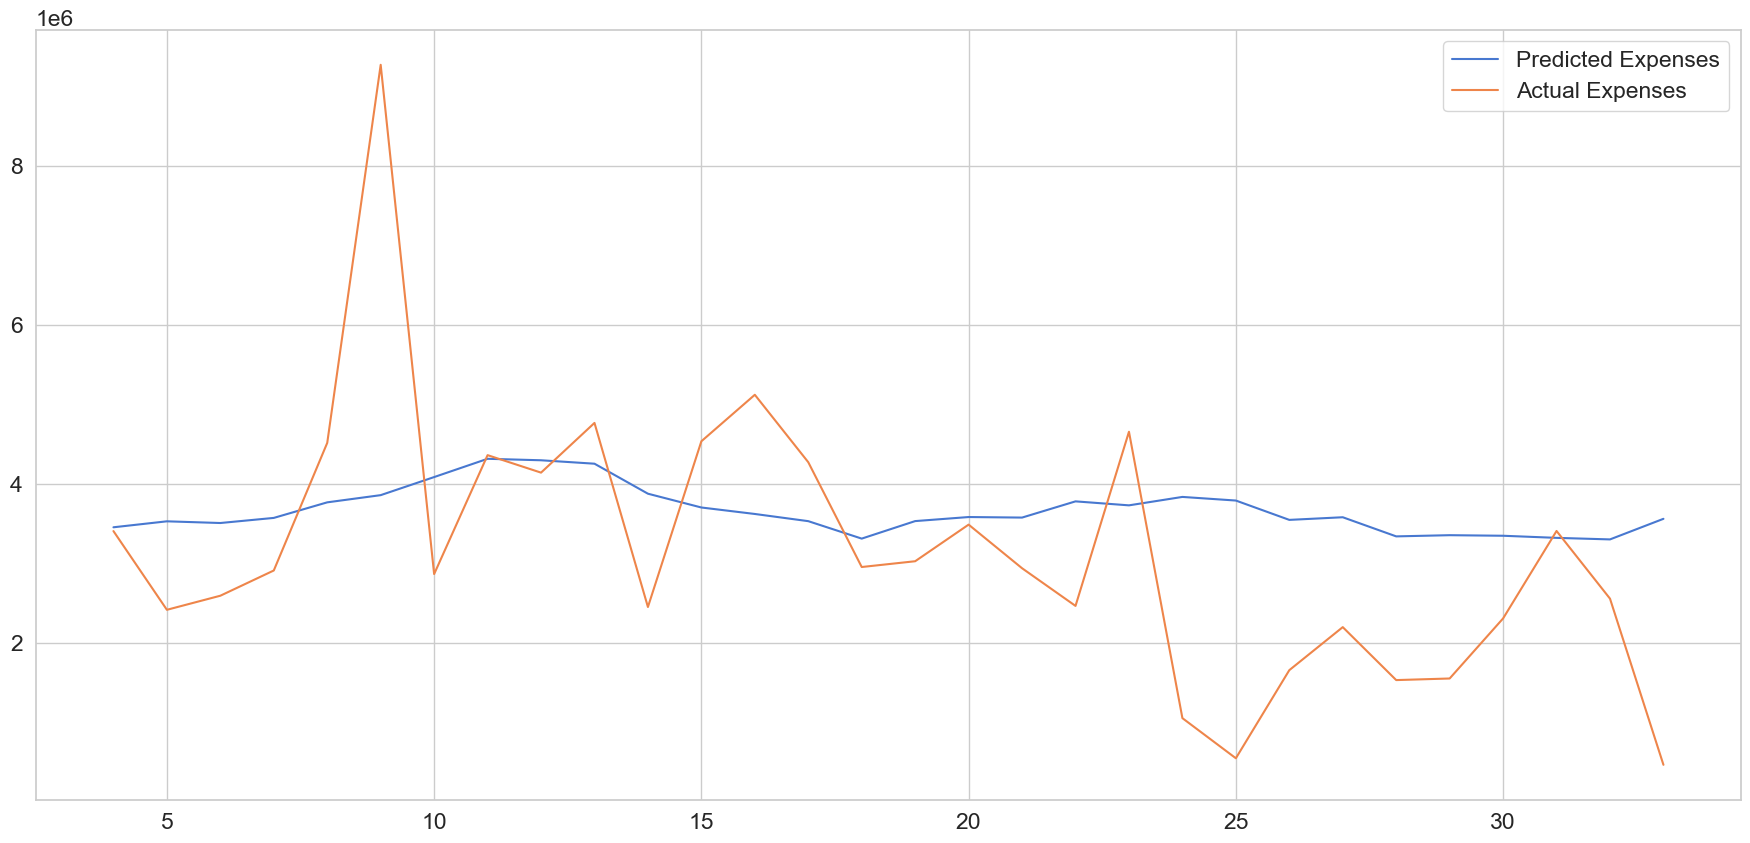

In [33]:
plt.plot(df.index[look_back:], df['expenses'][look_back:], label='Predicted Expenses')
plt.plot(df.index[look_back:], actual['expenses'][look_back:], label='Actual Expenses')
plt.legend()
plt.show()

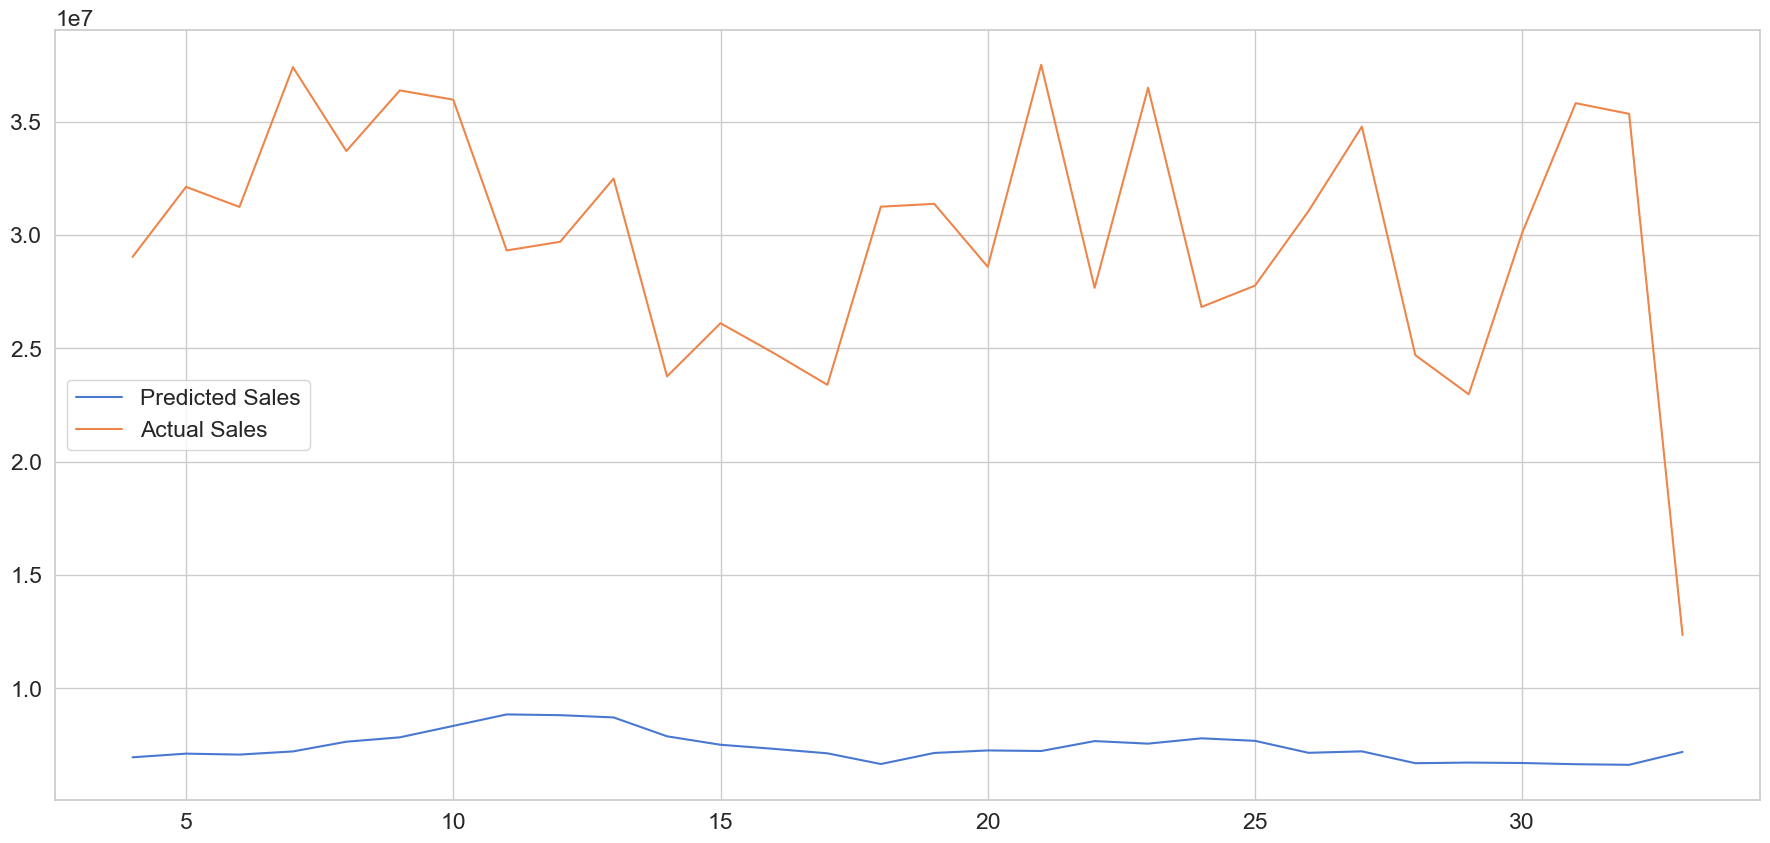

In [34]:
plt.plot(df.index[look_back:], df['sales'][look_back:], label='Predicted Sales')
plt.plot(df.index[look_back:], actual['sales'][look_back:], label='Actual Sales')
plt.legend()
plt.show()

In [72]:
df['sales'], actual['sales']

(0     5235284.5
 1     6021768.5
 2     6230664.5
 3     6603206.0
 4     6828747.0
 5     6951388.0
 6     6918911.0
 7     7023294.0
 8     7343738.0
 9     7489487.0
 10    7867062.0
 11    8242489.0
 12    8214318.5
 13    8140993.5
 14    7527009.0
 15    7246064.0
 16    7111270.5
 17    6964426.0
 18    6605977.0
 19    6973612.5
 20    7054537.0
 21    7036480.0
 22    7366341.0
 23    7281692.5
 24    7456956.0
 25    7376479.0
 26    6977394.5
 27    7024701.0
 28    6628138.0
 29    6649752.5
 30    6636531.5
 31    6598321.5
 32    6577290.0
 33    7006050.0
 Name: sales, dtype: float32,
 0     26225713.0
 1     31706881.0
 2     27735977.0
 3     28209077.0
 4     29040989.0
 5     32128017.0
 6     31244921.0
 7     37411276.0
 8     33710895.0
 9     36385063.0
 10    35976421.0
 11    29323893.0
 12    29705951.0
 13    32494700.0
 14    23765663.0
 15    26111337.0
 16    24789659.0
 17    23393838.0
 18    31253918.0
 19    31380638.0
 20    28603720.0
 21    3751522